In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
from scipy import stats

### Central Limit Theorem
If you have a population (regardless of distribution) with mean μ and take sufficiently large random samples (usually N > 30) from the population, then the distribution of the sample means will be approximately normally distributed

In [2]:
roll  = stats.randint(1, 7)

Text(0.5, 1.0, 'Uniform Population distribution')

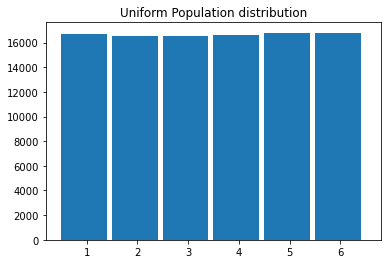

In [3]:
plt.hist(roll.rvs(100000), bins= [1,2,3,4,5,6,7], align = 'left', width = 0.9)
plt.title('Uniform Population distribution')

In [4]:
roll.rvs(100000).mean()

3.50182

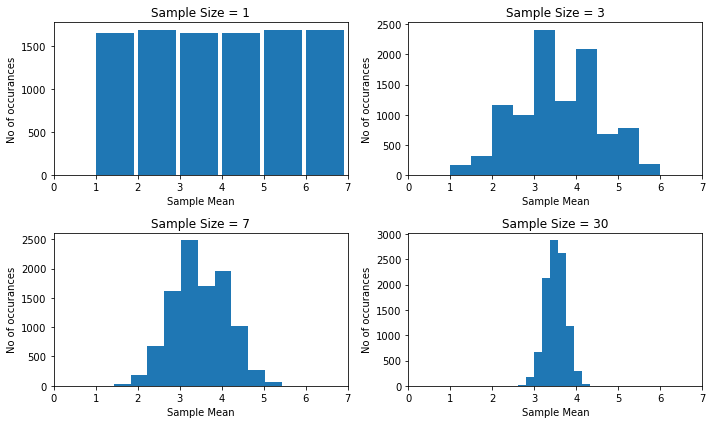

# Chi$^2$ ($\chi^2$) Test for Independence

aka Pearson's Chi$^2$ test. Pronounced as 'Ki' as in kite.


https://docs.google.com/presentation/d/13V7cMcgbM6bIQL2fbMtONre15iiNKpxnX7ECiWTxrVI/edit?usp=sharing


Lets us test the hypothesis that one group is independent of another
- $H_0$ is always that there is no association between the groups (they are independent)
- $H_a$ is that there is a association (they are not independent) between the groups


The null hypothesis assumes that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable

## The Quick Way To Run a Chi$^2$ Test

In [5]:
# get data from pydataset
df = data('tips')

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


Form hypothesis:

- $H_0$ There is no association between the smoker and time of the day (independence)
- $H_a$ is that there is a association between smoker and time of day

In [8]:
# pandas crosstab to make a 'contingency' table
observed = pd.crosstab(df.smoker, df.time)
observed

time,Dinner,Lunch
smoker,,
No,106,45
Yes,70,23


In [9]:
# Set our alpha
alpha = 0.05

In [14]:
# chi2_contingency returns 4 different values

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [15]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[106  45]
 [ 70  23]]
---
Expected

[[108  42]
 [ 67  25]]
---

chi^2 = 0.5054
p     = 0.4771


In [16]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


## Attrition Data

In [17]:
# get your data
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/6ba2dd985c9aa92f5598fc0f7c359f6a/raw/b20a508cee46e6ac69eb1e228b167d6f42d665d8/attrition.csv")

In [18]:
# check the head
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
# check shape of the dataframe
df.shape

(1470, 35)

In [21]:
# Check for which columns are discrete/categorical?
#df.nunique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Question we want to answer:

#### 1. Is Attrition independent from Business Travel amount?



In [22]:
# look at # of categories in Attrition column

df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [23]:
# look at # of categories in business travel

df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Form hypothesis:

$H_0$: Attrition and Business travel have no association (They are independent)

$H_a$: Attrition and Business travel are associated (they are dependent)

In [27]:
# Crosstab Attrition vs Business Travel
# To get my observed values:

observed = pd.crosstab(df.Attrition, df.BusinessTravel)
observed

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,138,208,887
Yes,12,69,156


In [28]:
# Set our alpha

alpha = .05

In [29]:
# .chi2_contingency returns 4 different values

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [30]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[138 208 887]
 [ 12  69 156]]
---
Expected

[[125 232 874]
 [ 24  44 168]]
---

chi^2 = 24.1824
p     = 0.0000


In [31]:
null_hypothesis = "Attrition and Business Travel are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")



We reject the hypothesis that Attrition and Business Travel are independent


## Mini Exercise:
#### Is Attrition independent from Department?

Form the null and alternate hypothesis

- $H_0$: There is no association between dept and attrition (independence)
- $H_a$: There is an association between dept and attrition

In [32]:
# how many categories we have in 'Department' column? (hint: value_counts())
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [33]:
# crosstab for observed values between Attrition and Depts
observed = pd.crosstab(df.Department, df.Attrition)
observed

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [34]:
# use stats.chi2_contingency test 

chi2, p, degf, expected = stats.chi2_contingency(observed)

Decide using p-value:

In [35]:
print('Observed\n')  #\n creates a new line
print(observed.values)
print('---\nExpected\n')  #---\n creates a new line after the ---
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') 
print(f'p     = {p:.4f}')

Observed

[[ 51  12]
 [828 133]
 [354  92]]
---
Expected

[[ 52  10]
 [806 154]
 [374  71]]
---

chi^2 = 10.7960
p     = 0.0045


In [36]:
null_hypothesis = "Department and Attrition are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")


We reject the hypothesis that Department and Attrition are independent


# Exercises to copy into Hypothesis Testing notebook 


1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

        Codeup Student	Not Codeup Student
        Uses a Macbook	49	20
        Doesn't Use A Macbook	1	30


2. Choose another 2 categorical variables from the mpg dataset and perform a 
c
h
i
2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

3. Use the data from the employees database to answer these questions:

        A) Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
        B) Is an employee's gender independent of whether or not they are or have been a manager?

In [44]:
index = ['Mac', 'No Mac']
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()

observed

,Codeup Student,Not Codeup Student
Mac,49,20
No Mac,1,30


In [48]:
#long method of finding expected values:

#c1= 50/n
#c2= 50/n
#r1= 69/n
#r2= 31/n

#expected = pd.DataFrame([[(c1*r1), (c2*r1)], [(c1*r2), (c2*r2)]], index=index, columns=columns) * n
#expected

In [49]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


In [47]:
null_hypothesis = "Using a Macbook and Being a Codeup Student are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")


We reject the hypothesis that Using a Macbook and Being a Codeup Student are independent


###### Choose another 2 categorical variables from the mpg dataset and perform a c h i 2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [50]:
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [52]:
#we can see that the columns manufacturer, model, trans, drv, and class are categorical

In [53]:
#pick two to compare: manufacturer and class

In [55]:
# crosstab for observed values between Manufacturer and Class
observed = pd.crosstab(df.manufacturer, df["class"])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
manufacturer,,,,,,,
audi,0,15,3,0,0,0,0
chevrolet,5,0,5,0,0,0,9
dodge,0,0,0,11,19,0,7
ford,0,0,0,0,7,9,9
honda,0,0,0,0,0,9,0
hyundai,0,0,7,0,0,7,0
jeep,0,0,0,0,0,0,8
land rover,0,0,0,0,0,0,4
lincoln,0,0,0,0,0,0,3


In [56]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [57]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 0 15  3  0  0  0  0]
 [ 5  0  5  0  0  0  9]
 [ 0  0  0 11 19  0  7]
 [ 0  0  0  0  7  9  9]
 [ 0  0  0  0  0  9  0]
 [ 0  0  7  0  0  7  0]
 [ 0  0  0  0  0  0  8]
 [ 0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  4]
 [ 0  2  7  0  0  0  4]
 [ 0  0  5  0  0  0  0]
 [ 0  4  0  0  0  4  6]
 [ 0 12  7  0  7  0  8]
 [ 0 14  7  0  0  6  0]]
---
Expected

[[0.38461538 3.61538462 3.15384615 0.84615385 2.53846154 2.69230769
  4.76923077]
 [0.40598291 3.81623932 3.32905983 0.89316239 2.67948718 2.84188034
  5.03418803]
 [0.79059829 7.43162393 6.48290598 1.73931624 5.21794872 5.53418803
  9.8034188 ]
 [0.53418803 5.02136752 4.38034188 1.17521368 3.52564103 3.73931624
  6.62393162]
 [0.19230769 1.80769231 1.57692308 0.42307692 1.26923077 1.34615385
  2.38461538]
 [0.2991453  2.81196581 2.45299145 0.65811966 1.97435897 2.09401709
  3.70940171]
 [0.17094017 1.60683761 1.4017094  0.37606838 1.12820513 1.1965812
  2.11965812]
 [0.08547009 0.8034188  0.7008547  0.18803

In [58]:
null_hypothesis = "Manufacturer and Class are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")


We reject the hypothesis that Manufacturer and Class are independent
